# Read In Data and Libraries

In [80]:
import pandas as pd

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math
import datetime as dt
import pdb

import os

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [81]:
rawDF = pd.read_csv('Absenteeism_data.csv')

In [82]:
rawDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 12 columns):
ID                           700 non-null int64
Reason for Absence           700 non-null int64
Date                         700 non-null object
Transportation Expense       700 non-null int64
Distance to Work             700 non-null int64
Age                          700 non-null int64
Daily Work Load Average      700 non-null float64
Body Mass Index              700 non-null int64
Education                    700 non-null int64
Children                     700 non-null int64
Pets                         700 non-null int64
Absenteeism Time in Hours    700 non-null int64
dtypes: float64(1), int64(10), object(1)
memory usage: 65.7+ KB


In [83]:
rawDF.describe(include = "all")

,ID,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
count,700.000000,700.000000,700,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
unique,NaN,NaN,432,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,24/10/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,17.951429,19.411429,NaN,222.347143,29.892857,36.417143,271.801774,26.737143,1.282857,1.021429,0.687143,6.761429
std,11.028144,8.356292,NaN,66.312960,14.804446,6.379083,40.021804,4.254701,0.668090,1.112215,1.166095,12.670082
min,1.000000,0.000000,NaN,118.000000,5.000000,27.000000,205.917000,19.000000,1.000000,0.000000,0.000000,0.000000
25%,9.000000,13.000000,NaN,179.000000,16.000000,31.000000,241.476000,24.000000,1.000000,0.000000,0.000000,2.000000
50%,18.000000,23.000000,NaN,225.000000,26.000000,37.000000,264.249000,25.000000,1.000000,1.000000,0.000000,3.000000
75%,28.000000,27.000000,NaN,260.000000,50.000000,40.000000,294.217000,31.000000,1.000000,2.000000,1.000000,8.000000


In [84]:
rawDF.head()

,ID,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,11,26,07/07/2015,289,36,33,239.554,30,1,2,1,4
1,36,0,14/07/2015,118,13,50,239.554,31,1,1,0,0
2,3,23,15/07/2015,179,51,38,239.554,31,1,0,0,2
3,7,7,16/07/2015,279,5,39,239.554,24,1,2,0,4
4,11,23,23/07/2015,289,36,33,239.554,30,1,2,1,2


In [85]:
cleanDF = rawDF.drop(columns = ["ID"])

cleanDF.head()

,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,26,07/07/2015,289,36,33,239.554,30,1,2,1,4
1,0,14/07/2015,118,13,50,239.554,31,1,1,0,0
2,23,15/07/2015,179,51,38,239.554,31,1,0,0,2
3,7,16/07/2015,279,5,39,239.554,24,1,2,0,4
4,23,23/07/2015,289,36,33,239.554,30,1,2,1,2


# Data Cleaning and Preprocessing

### DateTime on Date Column

In [86]:
cleanDF.info()
cleanDF["Date"] = pd.to_datetime(cleanDF["Date"], dayfirst = True)
cleanDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
Reason for Absence           700 non-null int64
Date                         700 non-null object
Transportation Expense       700 non-null int64
Distance to Work             700 non-null int64
Age                          700 non-null int64
Daily Work Load Average      700 non-null float64
Body Mass Index              700 non-null int64
Education                    700 non-null int64
Children                     700 non-null int64
Pets                         700 non-null int64
Absenteeism Time in Hours    700 non-null int64
dtypes: float64(1), int64(9), object(1)
memory usage: 60.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
Reason for Absence           700 non-null int64
Date                         700 non-null datetime64[ns]
Transportation Expense       700 non-null int64
Distance to Work             700 non-null i

In [87]:
cleanDF["Date"].iloc[0].dayofweek

1

In [88]:
cleanDF["Day of Week"] = cleanDF["Date"].apply(lambda x: x.dayofweek)
cleanDF["Month"] = cleanDF["Date"].apply(lambda x: x.month)

In [89]:
cleanDF

,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Day of Week,Month
0,26,2015-07-07,289,36,33,239.554,30,1,2,1,4,1,7
1,0,2015-07-14,118,13,50,239.554,31,1,1,0,0,1,7
2,23,2015-07-15,179,51,38,239.554,31,1,0,0,2,2,7
3,7,2015-07-16,279,5,39,239.554,24,1,2,0,4,3,7
4,23,2015-07-23,289,36,33,239.554,30,1,2,1,2,3,7
5,23,2015-07-10,179,51,38,239.554,31,1,0,0,2,4,7
6,22,2015-07-17,361,52,28,239.554,27,1,1,4,8,4,7
7,23,2015-07-24,260,50,36,239.554,23,1,4,0,4,4,7
8,19,2015-07-06,155,12,34,239.554,25,1,2,0,40,0,7
9,22,2015-07-13,235,11,37,239.554,29,3,1,1,8,0,7


### Get Dummies for Reason's for Absence

In [90]:
cleanDF["Reason for Absence"].value_counts()

23    147
28    110
27     66
13     52
0      38
19     36
22     32
26     31
25     29
11     24
10     22
18     21
14     18
1      16
7      13
12      8
6       6
21      6
8       5
9       4
5       3
24      3
16      3
4       2
15      2
3       1
2       1
17      1
Name: Reason for Absence, dtype: int64

In [91]:
def assignGroup(reasonNumber):
    if reasonNumber in range(1,15):
        return 1
    elif reasonNumber in range(15,18):
        return 2
    elif reasonNumber in range(18,23):
        return 3
    elif reasonNumber in range(22,29):
        return 4
    else:
        return 0
    

In [92]:
cleanDF["Reason Absence Group Number"] = cleanDF["Reason for Absence"].apply(lambda x: assignGroup(x))

In [93]:
cleanDF

,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Day of Week,Month,Reason Absence Group Number
0,26,2015-07-07,289,36,33,239.554,30,1,2,1,4,1,7,4
1,0,2015-07-14,118,13,50,239.554,31,1,1,0,0,1,7,0
2,23,2015-07-15,179,51,38,239.554,31,1,0,0,2,2,7,4
3,7,2015-07-16,279,5,39,239.554,24,1,2,0,4,3,7,1
4,23,2015-07-23,289,36,33,239.554,30,1,2,1,2,3,7,4
5,23,2015-07-10,179,51,38,239.554,31,1,0,0,2,4,7,4
6,22,2015-07-17,361,52,28,239.554,27,1,1,4,8,4,7,3
7,23,2015-07-24,260,50,36,239.554,23,1,4,0,4,4,7,4
8,19,2015-07-06,155,12,34,239.554,25,1,2,0,40,0,7,3
9,22,2015-07-13,235,11,37,239.554,29,3,1,1,8,0,7,3


In [94]:
pd.options.display.max_columns = 200
cleanDF = pd.get_dummies(cleanDF, columns = ["Reason Absence Group Number"])


In [95]:
cleanDF = cleanDF.drop(columns=["Date", "Reason for Absence"])

In [96]:
cleanDF.head(15)

,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Day of Week,Month,Reason Absence Group Number_0,Reason Absence Group Number_1,Reason Absence Group Number_2,Reason Absence Group Number_3,Reason Absence Group Number_4
0,289,36,33,239.554,30,1,2,1,4,1,7,0,0,0,0,1
1,118,13,50,239.554,31,1,1,0,0,1,7,1,0,0,0,0
2,179,51,38,239.554,31,1,0,0,2,2,7,0,0,0,0,1
3,279,5,39,239.554,24,1,2,0,4,3,7,0,1,0,0,0
4,289,36,33,239.554,30,1,2,1,2,3,7,0,0,0,0,1
5,179,51,38,239.554,31,1,0,0,2,4,7,0,0,0,0,1
6,361,52,28,239.554,27,1,1,4,8,4,7,0,0,0,1,0
7,260,50,36,239.554,23,1,4,0,4,4,7,0,0,0,0,1
8,155,12,34,239.554,25,1,2,0,40,0,7,0,0,0,1,0
9,235,11,37,239.554,29,3,1,1,8,0,7,0,0,0,1,0


In [97]:
#dropping first dummy gruop to avoid multi-conlinearity - this will be our base case if all other groups are 0
cleanDF.drop(columns=["Reason Absence Group Number_0"], inplace=True)

In [98]:
def mapEducation(number):
    if number < 2:
        return 0
    else:
        return 1


cleanDF["Education"] = cleanDF["Education"].apply(lambda x: mapEducation(x))

In [99]:
cleanDF.head(10)

,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Day of Week,Month,Reason Absence Group Number_1,Reason Absence Group Number_2,Reason Absence Group Number_3,Reason Absence Group Number_4
0,289,36,33,239.554,30,0,2,1,4,1,7,0,0,0,1
1,118,13,50,239.554,31,0,1,0,0,1,7,0,0,0,0
2,179,51,38,239.554,31,0,0,0,2,2,7,0,0,0,1
3,279,5,39,239.554,24,0,2,0,4,3,7,1,0,0,0
4,289,36,33,239.554,30,0,2,1,2,3,7,0,0,0,1
5,179,51,38,239.554,31,0,0,0,2,4,7,0,0,0,1
6,361,52,28,239.554,27,0,1,4,8,4,7,0,0,1,0
7,260,50,36,239.554,23,0,4,0,4,4,7,0,0,0,1
8,155,12,34,239.554,25,0,2,0,40,0,7,0,0,1,0
9,235,11,37,239.554,29,1,1,1,8,0,7,0,0,1,0


In [100]:
solutionDF = pd.read_csv("df_preprocessedSolution.csv")

* Solution matches manual preprocessing

In [101]:
preprocessedData = cleanDF
preprocessedData.to_csv("preprocessed data Mishaun.csv")

In [102]:
df = pd.read_csv('preprocessed data Mishaun.csv')

# EDA 

In [103]:
df.info()
df = df.iloc[:,1:]
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 16 columns):
Unnamed: 0                       700 non-null int64
Transportation Expense           700 non-null int64
Distance to Work                 700 non-null int64
Age                              700 non-null int64
Daily Work Load Average          700 non-null float64
Body Mass Index                  700 non-null int64
Education                        700 non-null int64
Children                         700 non-null int64
Pets                             700 non-null int64
Absenteeism Time in Hours        700 non-null int64
Day of Week                      700 non-null int64
Month                            700 non-null int64
Reason Absence Group Number_1    700 non-null int64
Reason Absence Group Number_2    700 non-null int64
Reason Absence Group Number_3    700 non-null int64
Reason Absence Group Number_4    700 non-null int64
dtypes: float64(1), int64(15)
memory usage: 87.6 KB


,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Day of Week,Month,Reason Absence Group Number_1,Reason Absence Group Number_2,Reason Absence Group Number_3,Reason Absence Group Number_4
0,289,36,33,239.554,30,0,2,1,4,1,7,0,0,0,1
1,118,13,50,239.554,31,0,1,0,0,1,7,0,0,0,0
2,179,51,38,239.554,31,0,0,0,2,2,7,0,0,0,1
3,279,5,39,239.554,24,0,2,0,4,3,7,1,0,0,0
4,289,36,33,239.554,30,0,2,1,2,3,7,0,0,0,1


In [104]:
depVar = df['Absenteeism Time in Hours']
indepVars = df[list(filter(lambda x: "Absenteeism" not in x, df.columns))]

depVar.head(3)
indepVars.head(3)

0    4
1    0
2    2
Name: Absenteeism Time in Hours, dtype: int64

,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Day of Week,Month,Reason Absence Group Number_1,Reason Absence Group Number_2,Reason Absence Group Number_3,Reason Absence Group Number_4
0,289,36,33,239.554,30,0,2,1,1,7,0,0,0,1
1,118,13,50,239.554,31,0,1,0,1,7,0,0,0,0
2,179,51,38,239.554,31,0,0,0,2,7,0,0,0,1


Absenteeism Time in Hours        1.000000
Reason Absence Group Number_4    0.308974
Reason Absence Group Number_1    0.282919
Reason Absence Group Number_3    0.179111
Day of Week                      0.119068
Children                         0.093661
Distance to Work                 0.080593
Body Mass Index                  0.040203
Age                              0.035784
Education                        0.031780
Daily Work Load Average          0.029609
Pets                             0.024522
Month                            0.017625
Reason Absence Group Number_2    0.012936
Transportation Expense           0.008342
Name: Absenteeism Time in Hours, dtype: float64

<Figure size 1800x1080 with 0 Axes>

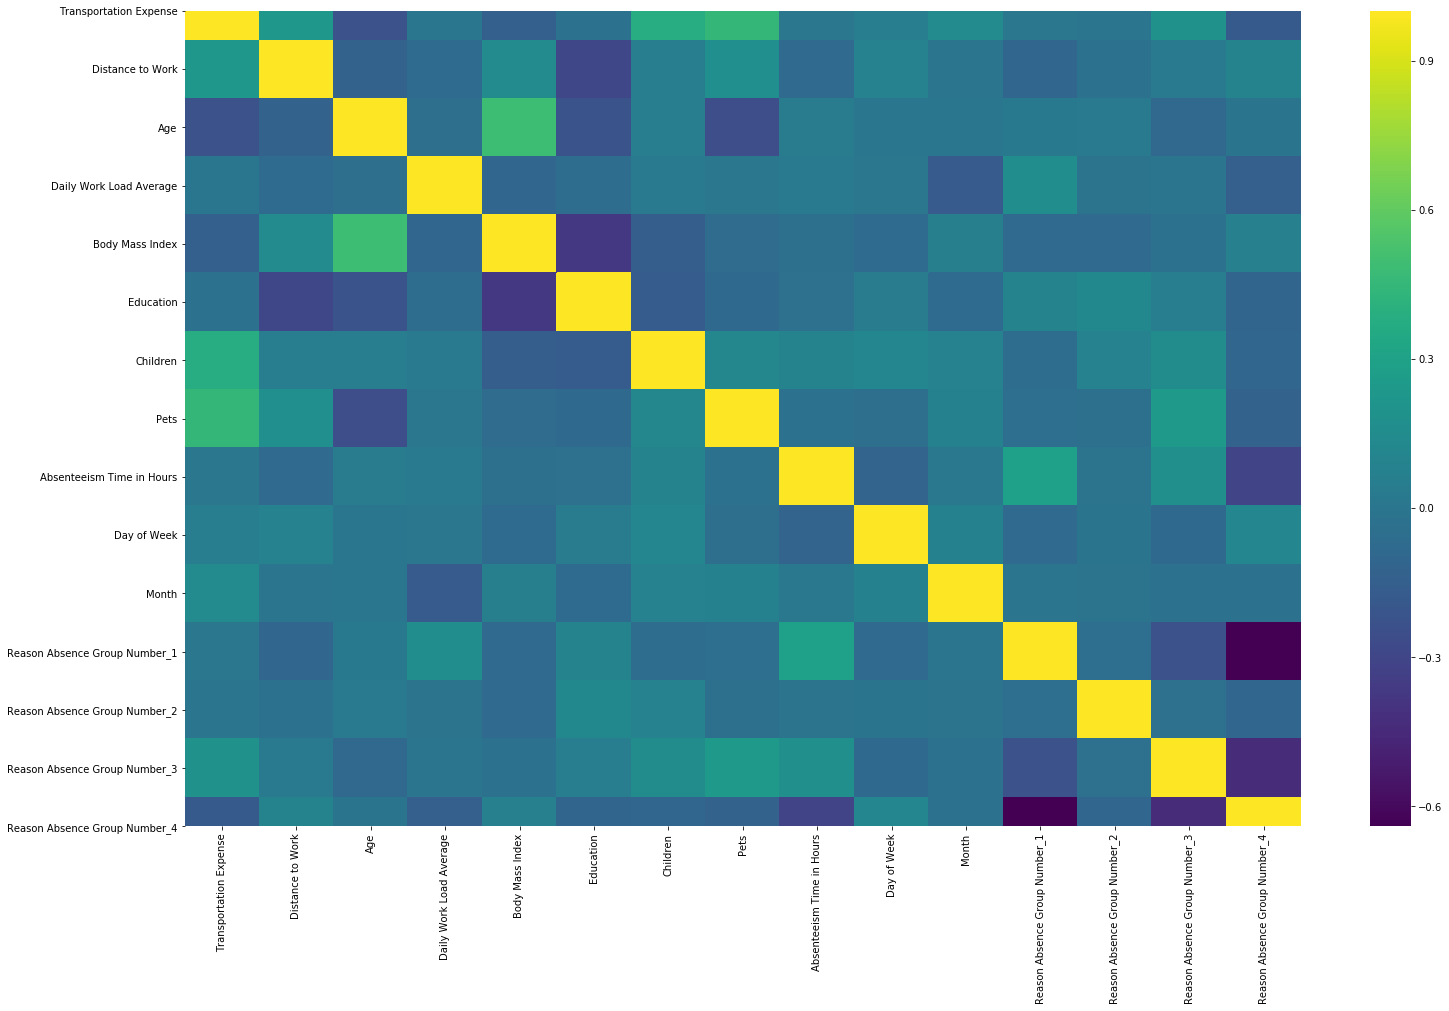

In [105]:
abs(df.corr()["Absenteeism Time in Hours"]).sort_values(ascending = False)

plt.figure(figsize=(25,15))
sns.heatmap(df.corr(), cmap = 'viridis')

In [106]:
df.describe(include = "all").T

,count,mean,std,min,25%,50%,75%,max
Transportation Expense,700.0,222.347143,66.312960,118.000,179.000,225.000,260.000,388.000
Distance to Work,700.0,29.892857,14.804446,5.000,16.000,26.000,50.000,52.000
Age,700.0,36.417143,6.379083,27.000,31.000,37.000,40.000,58.000
Daily Work Load Average,700.0,271.801774,40.021804,205.917,241.476,264.249,294.217,378.884
Body Mass Index,700.0,26.737143,4.254701,19.000,24.000,25.000,31.000,38.000
Education,700.0,0.167143,0.373370,0.000,0.000,0.000,0.000,1.000
Children,700.0,1.021429,1.112215,0.000,0.000,1.000,2.000,4.000
Pets,700.0,0.687143,1.166095,0.000,0.000,0.000,1.000,8.000
Absenteeism Time in Hours,700.0,6.761429,12.670082,0.000,2.000,3.000,8.000,120.000
Day of Week,700.0,2.011429,1.480396,0.000,1.000,2.000,3.000,6.000


In [107]:
indepVars.columns

Index(['Transportation Expense', 'Distance to Work', 'Age',
       'Daily Work Load Average', 'Body Mass Index', 'Education', 'Children',
       'Pets', 'Day of Week', 'Month', 'Reason Absence Group Number_1',
       'Reason Absence Group Number_2', 'Reason Absence Group Number_3',
       'Reason Absence Group Number_4'],
      dtype='object')

<Figure size 720x360 with 0 Axes>

Text(0.5, 1.0, 'Transportation Expense vs Absent Time at Work')

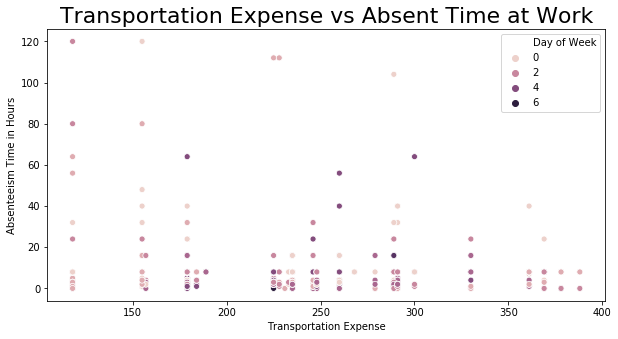

<Figure size 720x360 with 0 Axes>

Text(0.5, 1.0, 'Distance to Work vs Absent Time at Work')

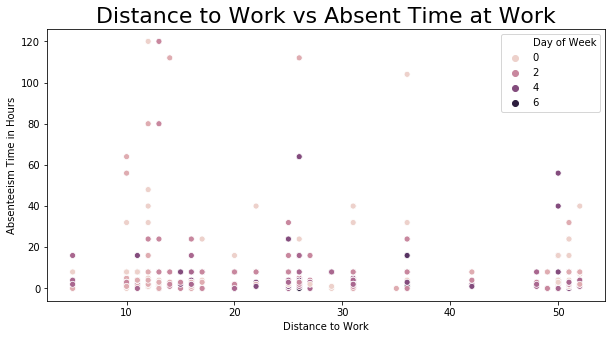

<Figure size 720x360 with 0 Axes>

Text(0.5, 1.0, 'Age vs Absent Time at Work')

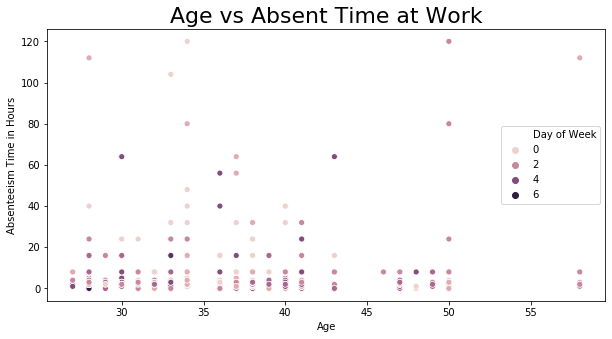

<Figure size 720x360 with 0 Axes>

Text(0.5, 1.0, 'Daily Work Load Average vs Absent Time at Work')

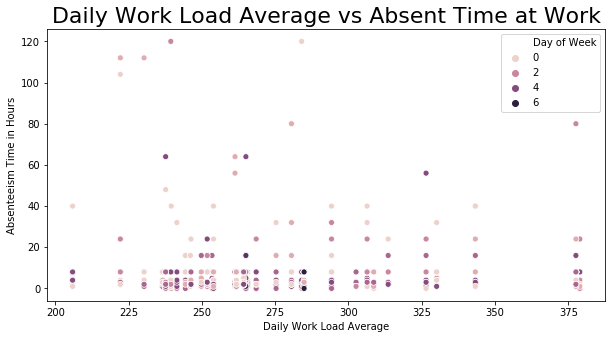

<Figure size 720x360 with 0 Axes>

Text(0.5, 1.0, 'Body Mass Index vs Absent Time at Work')

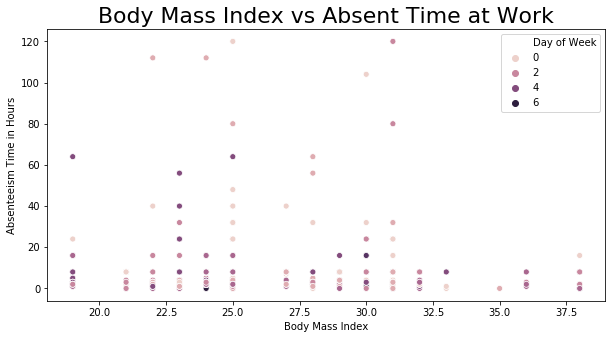

<Figure size 720x360 with 0 Axes>

Text(0.5, 1.0, 'Education vs Absent Time at Work')

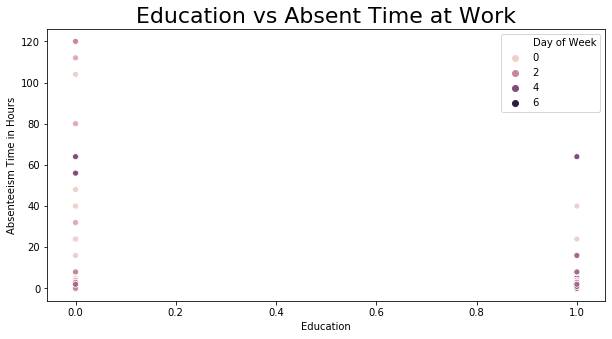

<Figure size 720x360 with 0 Axes>

Text(0.5, 1.0, 'Children vs Absent Time at Work')

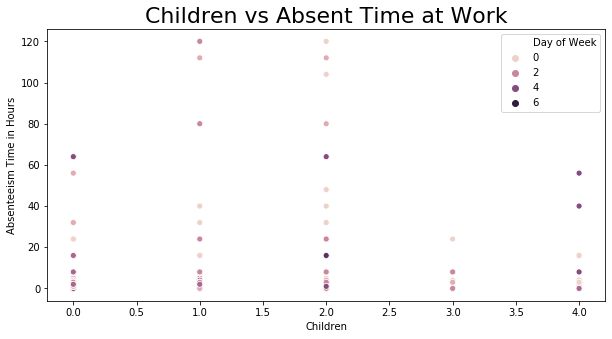

<Figure size 720x360 with 0 Axes>

Text(0.5, 1.0, 'Pets vs Absent Time at Work')

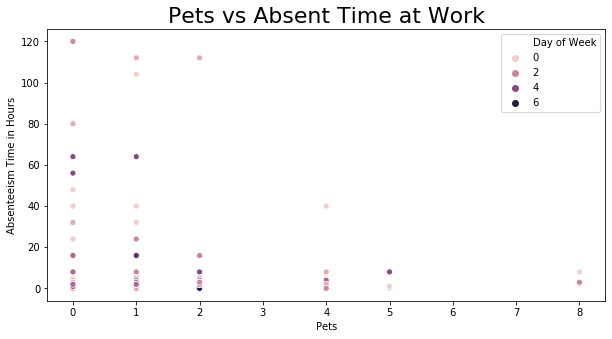

<Figure size 720x360 with 0 Axes>

Text(0.5, 1.0, 'Day of Week vs Absent Time at Work')

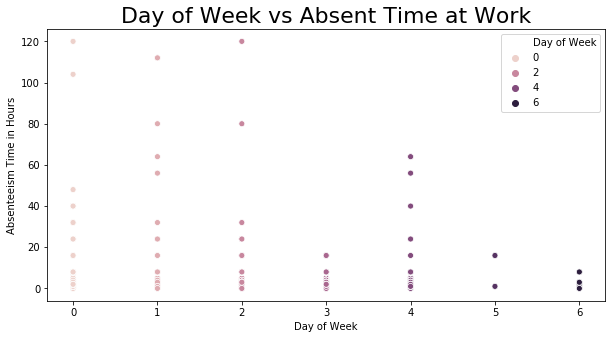

<Figure size 720x360 with 0 Axes>

Text(0.5, 1.0, 'Month vs Absent Time at Work')

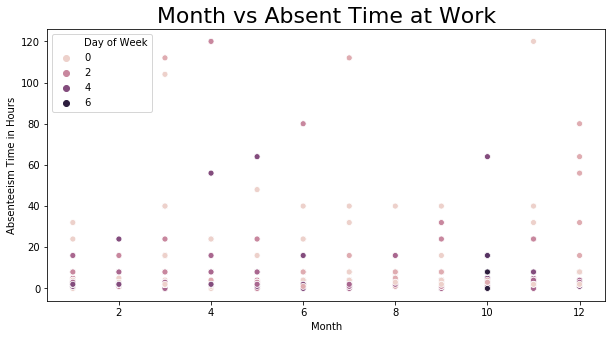

<Figure size 720x360 with 0 Axes>

Text(0.5, 1.0, 'Reason Absence Group Number_1 vs Absent Time at Work')

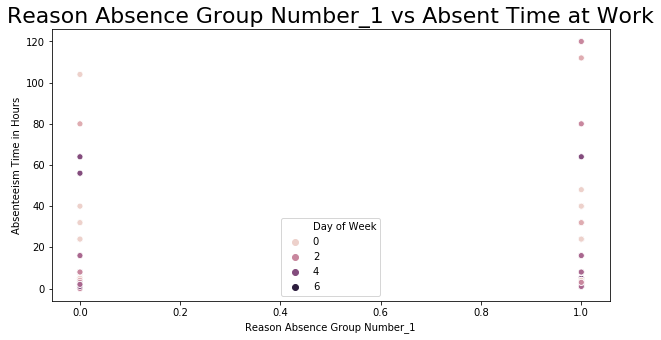

<Figure size 720x360 with 0 Axes>

Text(0.5, 1.0, 'Reason Absence Group Number_2 vs Absent Time at Work')

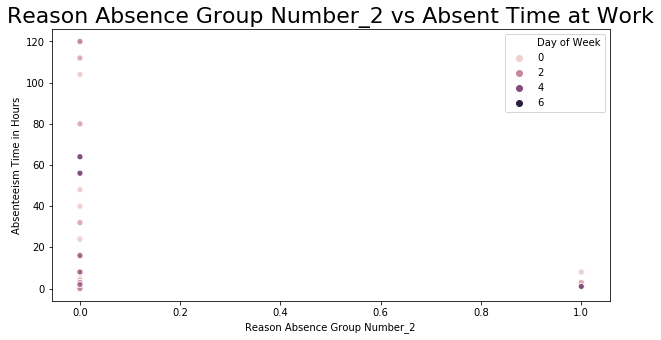

<Figure size 720x360 with 0 Axes>

Text(0.5, 1.0, 'Reason Absence Group Number_3 vs Absent Time at Work')

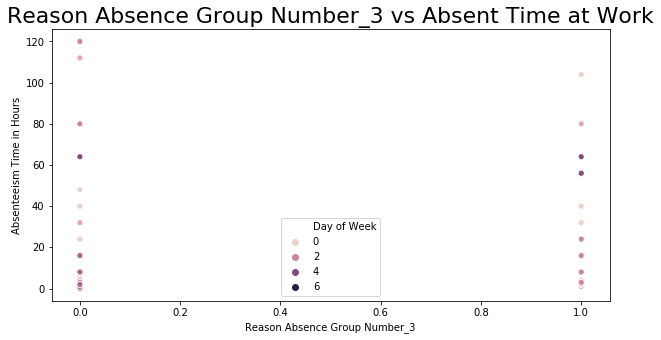

<Figure size 720x360 with 0 Axes>

Text(0.5, 1.0, 'Reason Absence Group Number_4 vs Absent Time at Work')

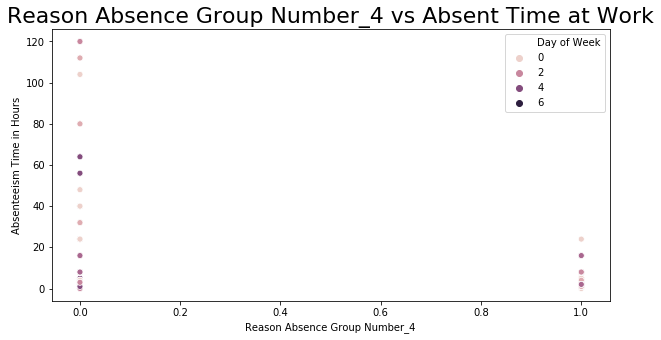

In [108]:
for var in indepVars.columns:
    plt.figure(figsize=(10,5))
    sns.scatterplot(x= df[var], y=df["Absenteeism Time in Hours"], hue = df["Day of Week"])
    plt.title("{} vs Absent Time at Work".format(var), size = 22)
    plt.show()

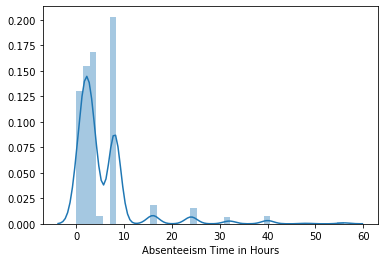

In [109]:
sns.distplot(df[df["Absenteeism Time in Hours"]<60]["Absenteeism Time in Hours"], bins = 40)

# ML Section

### Preprocessing to get Targets for Output Var

In [110]:
medianThreshold = df["Absenteeism Time in Hours"].median()


df["Excessively Absent"] = df["Absenteeism Time in Hours"].apply(lambda x: 1 if x > medianThreshold else 0)

* We will determine if someone is excessively absent if they are absent time is greater than the median of all records

In [111]:
dfTargets = df.drop(columns=["Absenteeism Time in Hours"])

dfTargets["Excessively Absent"].sum()/len(dfTargets)

0.45571428571428574

In [112]:
dfTargets.head()

,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Day of Week,Month,Reason Absence Group Number_1,Reason Absence Group Number_2,Reason Absence Group Number_3,Reason Absence Group Number_4,Excessively Absent
0,289,36,33,239.554,30,0,2,1,1,7,0,0,0,1,1
1,118,13,50,239.554,31,0,1,0,1,7,0,0,0,0,0
2,179,51,38,239.554,31,0,0,0,2,7,0,0,0,1,0
3,279,5,39,239.554,24,0,2,0,3,7,1,0,0,0,1
4,289,36,33,239.554,30,0,2,1,3,7,0,0,0,1,0


<Figure size 720x360 with 0 Axes>

Text(0.5, 1.0, 'Transportation Expense vs Excessively Absent')

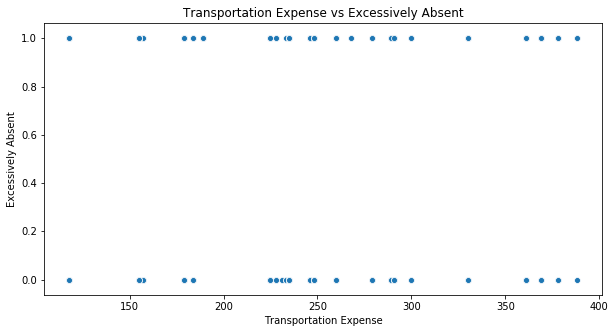

<Figure size 720x360 with 0 Axes>

Text(0.5, 1.0, 'Distance to Work vs Excessively Absent')

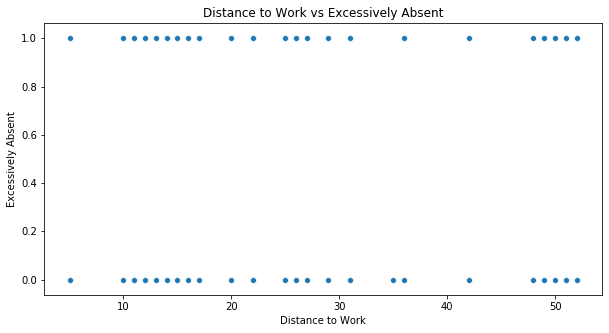

<Figure size 720x360 with 0 Axes>

Text(0.5, 1.0, 'Age vs Excessively Absent')

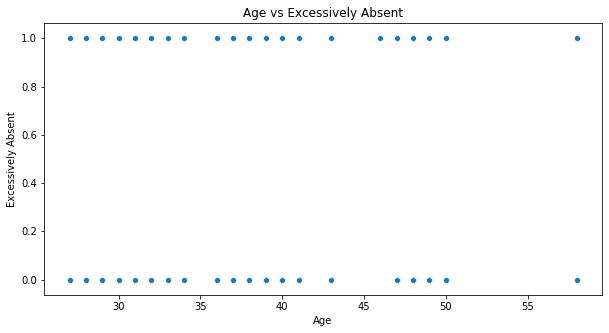

<Figure size 720x360 with 0 Axes>

Text(0.5, 1.0, 'Daily Work Load Average vs Excessively Absent')

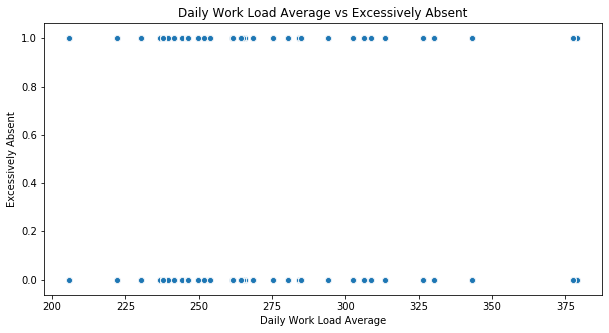

<Figure size 720x360 with 0 Axes>

Text(0.5, 1.0, 'Body Mass Index vs Excessively Absent')

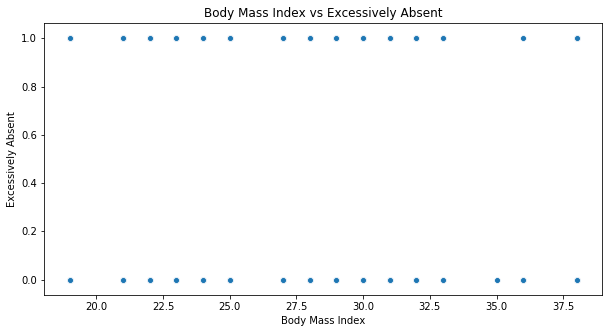

<Figure size 720x360 with 0 Axes>

Text(0.5, 1.0, 'Education vs Excessively Absent')

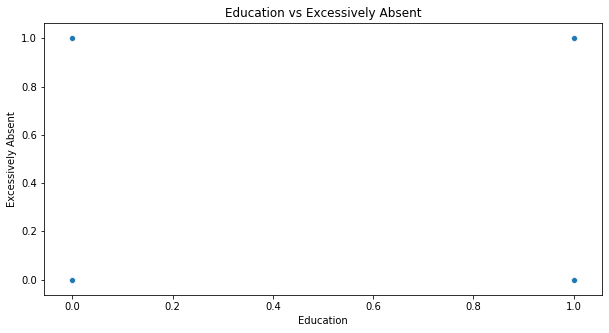

<Figure size 720x360 with 0 Axes>

Text(0.5, 1.0, 'Children vs Excessively Absent')

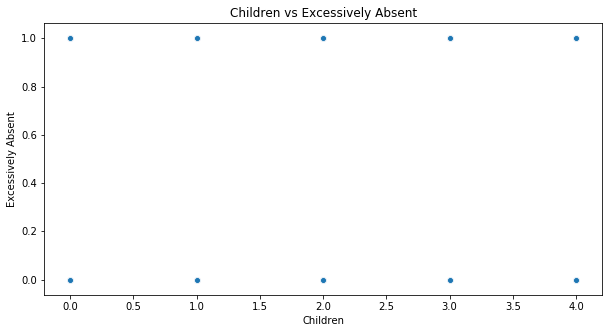

<Figure size 720x360 with 0 Axes>

Text(0.5, 1.0, 'Pets vs Excessively Absent')

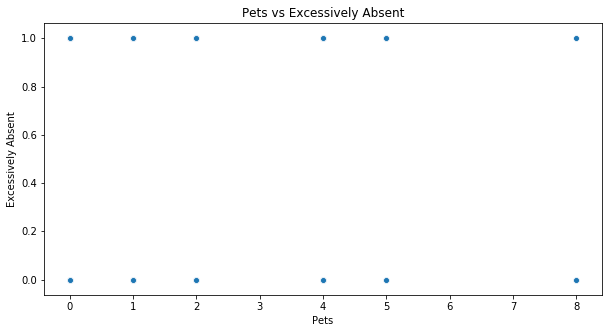

<Figure size 720x360 with 0 Axes>

Text(0.5, 1.0, 'Day of Week vs Excessively Absent')

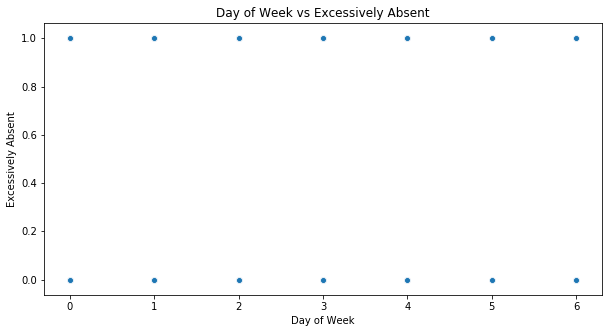

<Figure size 720x360 with 0 Axes>

Text(0.5, 1.0, 'Month vs Excessively Absent')

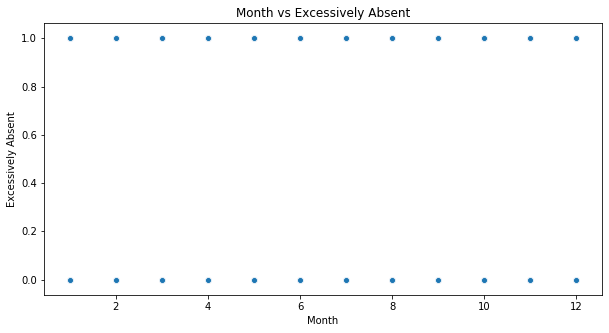

<Figure size 720x360 with 0 Axes>

Text(0.5, 1.0, 'Reason Absence Group Number_1 vs Excessively Absent')

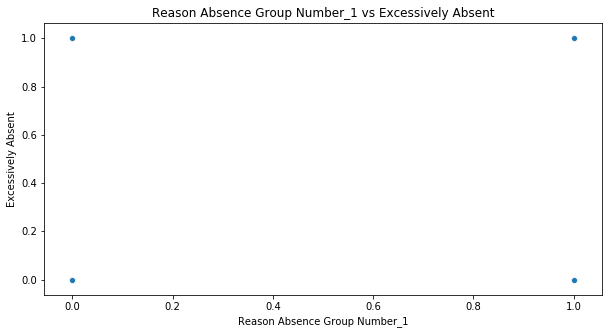

<Figure size 720x360 with 0 Axes>

Text(0.5, 1.0, 'Reason Absence Group Number_2 vs Excessively Absent')

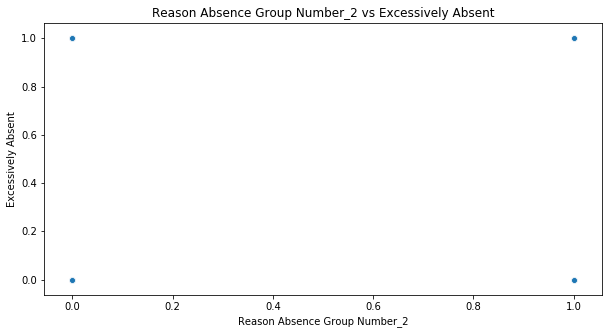

<Figure size 720x360 with 0 Axes>

Text(0.5, 1.0, 'Reason Absence Group Number_3 vs Excessively Absent')

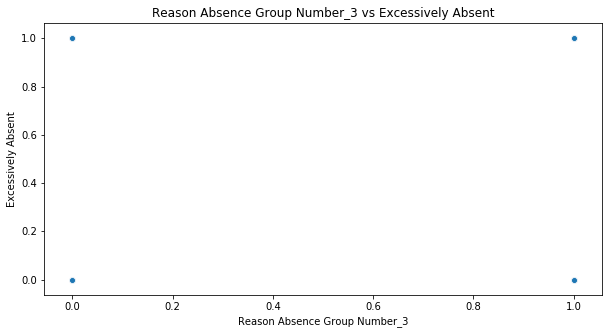

<Figure size 720x360 with 0 Axes>

Text(0.5, 1.0, 'Reason Absence Group Number_4 vs Excessively Absent')

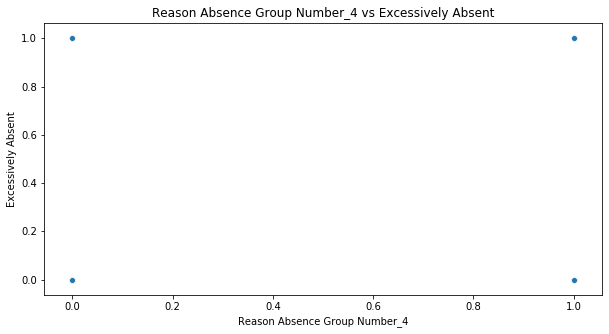

In [113]:
for column in dfTargets.iloc[:, :-1].columns:
    plt.figure(figsize = (10,5))
    sns.scatterplot(dfTargets[column], dfTargets["Excessively Absent"])
    plt.title("{} vs Excessively Absent".format(column))
    plt.show()

### Define inputs and scale

In [114]:
inputs = dfTargets.iloc[:,:-1]

response = dfTargets["Excessively Absent"]

In [115]:
from sklearn.preprocessing import StandardScaler

In [116]:
scaler = StandardScaler()

In [117]:
scaler.fit(inputs)
scaled_inputs = scaler.transform(inputs)

StandardScaler(copy=True, with_mean=True, with_std=True)

### Split Data - Test and Train

In [118]:
from sklearn.model_selection import train_test_split

In [119]:
X_train, X_test, y_train, y_test = train_test_split(scaled_inputs, response, test_size = .20, random_state = 20)

### Apply Logistic Regression

In [120]:
from sklearn.linear_model import LogisticRegression

In [121]:
logReg = LogisticRegression()

In [122]:
logReg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [123]:
predictions = logReg.predict(X_train)

In [124]:
from sklearn import metrics


In [125]:
logReg.score(X_train, y_train)

0.8035714285714286

In [126]:
intercept = logReg.intercept_
weights = logReg.coef_

In [127]:
weights.shape
intercept

(1, 14)

array([-0.18646174])

In [128]:
modelData = pd.DataFrame()
modelData["Weights"] = weights.reshape(weights.shape[1])

In [129]:
modelData["Feature"] = inputs.columns

In [130]:
modelData.loc[-1] = [intercept[0], "Intercept"]  # adding a row
modelData.index = modelData.index + 1  # shifting index
modelData = modelData.sort_index()  # sorting by index

In [131]:
modelData["Odds Ratio"] = np.exp(modelData["Weights"])

In [132]:
modelData.sort_values(by="Odds Ratio", ascending=False)

,Weights,Feature,Odds Ratio
11,2.020820,Reason Absence Group Number_1,7.544511
13,1.938741,Reason Absence Group Number_3,6.949993
14,1.181180,Reason Absence Group Number_4,3.258216
1,0.643631,Transportation Expense,1.903379
7,0.334918,Children,1.397825
12,0.331946,Reason Absence Group Number_2,1.393678
5,0.293219,Body Mass Index,1.340737
10,0.250316,Month,1.284432
4,-0.024569,Daily Work Load Average,0.975730
2,-0.051097,Distance to Work,0.950186


* Odds ratio close to 1 or weights close to 0 indicate that the feature is not significant for predicting the output variable - this is true b/c these are standardized coefficients
* odds ratio mean that your output variable, in this case being excessively absent, is  x "(odds ratio)" amount higher than the base case.  for ex, is reason 1 is given, then it is higher by the odds ratio to be excessive absent than if no reason was given
* in this model, we standarized the dummy vars which makes the interpretability a little harder, since they are 0 and 1, it is better to keep them unstandardized, therefore, it is good to run 2 models with standarized inputs, and one without

### Drop features with close to 0 weights and run new model

In [133]:
omitFeatures = modelData[ abs(modelData["Weights"]) < .1]["Feature"].values

In [134]:
newInputs = list(filter(lambda x: x not in omitFeatures, inputs.columns))

### New Logistic Regression Model with Eliminated Features

In [135]:
logReg2 = LogisticRegression()

In [136]:
newUnscaledInputs = dfTargets[newInputs]
scaler.fit(newUnscaledInputs)
newScaledInputs = scaler.transform(newUnscaledInputs)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [137]:
X_train, X_test, y_train, y_test = train_test_split(newScaledInputs, response, test_size = .20, random_state = 20)

In [138]:
logReg2.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [139]:
logReg2.score(X_train,y_train)

0.8071428571428572

In [140]:
newWeights = logReg2.coef_
newIntercept = logReg2.intercept_

In [141]:
newModelData = pd.DataFrame()
newModelData["newWeights"] = newWeights.reshape(newWeights.shape[1])

newModelData["Feature"] = newInputs

newModelData.loc[-1] = [intercept[0], "Intercept"]  # adding a row
newModelData.index = newModelData.index + 1  # shifting index
newModelData = newModelData.sort_index()  # sorting by index

newModelData["Odds Ratio"] = np.exp(newModelData["newWeights"])

newModelData.sort_values(by="Odds Ratio", ascending=False)

,newWeights,Feature,Odds Ratio
8,2.011197,Reason Absence Group Number_1,7.472258
10,1.931541,Reason Absence Group Number_3,6.900135
11,1.164544,Reason Absence Group Number_4,3.204461
1,0.626569,Transportation Expense,1.871180
9,0.332100,Reason Absence Group Number_2,1.393892
5,0.324903,Children,1.383896
3,0.297334,Body Mass Index,1.346265
7,0.251502,Month,1.285955
0,-0.186462,Intercept,0.829890
2,-0.192422,Age,0.824959


In [142]:
logReg2.score(X_test, y_test)

0.7714285714285715

In [143]:
probability = logReg2.predict_proba(X_test)

In [144]:
probability.shape

(140, 2)

* probability for data to be valued 0 (1st column) or valued at 1 (second column)

In [145]:
probability[:,1]

array([0.30273851, 0.36915929, 0.58082206, 0.19643263, 0.9319956 ,
       0.70980002, 0.6755971 , 0.92873393, 0.13338893, 0.24573014,
       0.93330315, 0.98818578, 0.96762505, 0.83618919, 0.80513726,
       0.36142877, 0.26527356, 0.91304125, 0.56954173, 0.97837963,
       0.23989448, 0.19643263, 0.67094623, 0.67094623, 0.83785789,
       0.18059972, 0.4722703 , 0.10737115, 0.92157826, 0.19643263,
       0.9223868 , 0.64001885, 0.73846887, 0.94170551, 0.19643263,
       0.95665282, 0.14191014, 0.85873202, 0.3250026 , 0.57800796,
       0.18534469, 0.40391586, 0.16031284, 0.11640683, 0.83148696,
       0.756418  , 0.7217759 , 0.30273851, 0.19383908, 0.17474653,
       0.59885441, 0.08256235, 0.70980002, 0.27004047, 0.85412523,
       0.40318479, 0.90094193, 0.19439945, 0.10349595, 0.11035068,
       0.68714021, 0.69478939, 0.28515581, 0.88094471, 0.12690835,
       0.27330794, 0.02159733, 0.14191014, 0.86680762, 0.87184464,
       0.14191014, 0.07711408, 0.93709209, 0.40809549, 0.55644

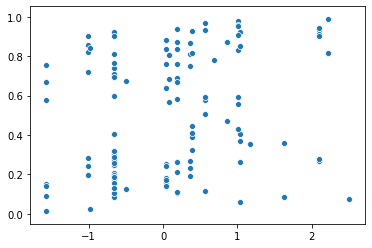

In [146]:
sns.scatterplot(X_test[:,0], probability[:,1])

# Save Model

In [147]:
import pickle

In [148]:
with open('logModel', 'wb') as file:
    pickle.dump(logReg2, file)

# Applying Model on Data Frame

In [149]:
dfTargets.head(3)

,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Day of Week,Month,Reason Absence Group Number_1,Reason Absence Group Number_2,Reason Absence Group Number_3,Reason Absence Group Number_4,Excessively Absent
0,289,36,33,239.554,30,0,2,1,1,7,0,0,0,1,1
1,118,13,50,239.554,31,0,1,0,1,7,0,0,0,0,0
2,179,51,38,239.554,31,0,0,0,2,7,0,0,0,1,0


In [150]:
#storing probability that employee will be excessively absent
dfTargets["Probability"] = logReg2.predict_proba(newScaledInputs)[:,1]


In [151]:
dfTargets.head()

,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Day of Week,Month,Reason Absence Group Number_1,Reason Absence Group Number_2,Reason Absence Group Number_3,Reason Absence Group Number_4,Excessively Absent,Probability
0,289,36,33,239.554,30,0,2,1,1,7,0,0,0,1,1,0.538661
1,118,13,50,239.554,31,0,1,0,1,7,0,0,0,0,0,0.016148
2,179,51,38,239.554,31,0,0,0,2,7,0,0,0,1,0,0.245730
3,279,5,39,239.554,24,0,2,0,3,7,1,0,0,0,1,0.899540
4,289,36,33,239.554,30,0,2,1,3,7,0,0,0,1,0,0.538661


# Connecting to Database

In [152]:
import pymysql

In [153]:
conn = pymysql.connect(database ='absence', user = 'root', password = 'GPhs-2012')

In [154]:
cursor = conn.cursor()

In [155]:
cursor.execute('Select * from absentRecords')

0

In [156]:
import pdb

In [173]:
insertString='INSERT INTO absentRecords Values'
for row in range(0,len(dfTargets)):
    insertString += '('
    
    for index, val in enumerate(dfTargets.iloc[row]):
        if index != len(dfTargets.iloc[row])-1:
            insertString += '{}, '.format(val)
        else:
            insertString += '{}'.format(val)
    if row != len(dfTargets)-1:
        insertString += '),'
    else:
        insertString += ');'

In [174]:
insertString

'INSERT INTO absentRecords Values(289.0, 36.0, 33.0, 239.554, 30.0, 0.0, 2.0, 1.0, 1.0, 7.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.5386608995624681),(118.0, 13.0, 50.0, 239.554, 31.0, 0.0, 1.0, 0.0, 1.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.016147591938372265),(179.0, 51.0, 38.0, 239.554, 31.0, 0.0, 0.0, 0.0, 2.0, 7.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.24573013897180912),(279.0, 5.0, 39.0, 239.554, 24.0, 0.0, 2.0, 0.0, 3.0, 7.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.8995398064437918),(289.0, 36.0, 33.0, 239.554, 30.0, 0.0, 2.0, 1.0, 3.0, 7.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.5386608995624681),(179.0, 51.0, 38.0, 239.554, 31.0, 0.0, 0.0, 0.0, 4.0, 7.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.24573013897180912),(361.0, 52.0, 28.0, 239.554, 27.0, 0.0, 1.0, 4.0, 4.0, 7.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.9237877269848946),(260.0, 50.0, 36.0, 239.554, 23.0, 0.0, 4.0, 0.0, 4.0, 7.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.5780079563926894),(155.0, 12.0, 34.0, 239.554, 25.0, 0.0, 2.0, 0.0, 0.0, 7.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.9034043130557223),(235.0, 11.0, 37.0,

### Insert Into Database and Verify - then commit

In [178]:
cursor.execute(insertString)

cursor.execute("select * from absentRecords limit 20;")

700

20

In [179]:
#committing changes to sql database
conn.commit()

In [180]:
conn.close()